# Fast,Furious and Insured:Machine Learning Challenge

**Vehicle insurance** is insurance for cars, trucks, motorcycles, and other road vehicles. Its main purpose is to provide financial protection against:

* Physical damage or bodily injury caused by traffic collisions
* Liability that could arise from incidents in a vehicle

Vehicle insurance may additionally offer financial protection against theft of the vehicle and against damage to the vehicle sustained because of events other than traffic collisions such as keying, weather or natural disasters, and damage sustained by colliding with stationary objects.

We have here different data for train and test, however, in the test data the column that we want to predict do not exist. Therefore, we only use the train data.


# **Task**

* Condition: Predict if the vehicle provided in the image is damaged or not
* Amount: Based on the condition of a vehicle, predict the insurance amount of the cars that are provided in the dataset

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.preprocessing import LabelEncoder

## Getting data from files

In [2]:
#Train Data
df=pd.read_csv("data/Fast_Furious_Insured/train.csv")
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [3]:
#Test Data
df_t=pd.read_csv("data/Fast_Furious_Insured/test.csv")
df_t.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


In [4]:
df.shape

(1399, 8)

In [5]:
df.isnull().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [6]:
df.nunique()

Image_path           1399
Insurance_company      11
Cost_of_vehicle       307
Min_coverage          307
Expiry_date          1063
Max_coverage          389
Condition               2
Amount               1186
dtype: int64

In [7]:
df.dtypes

Image_path            object
Insurance_company     object
Cost_of_vehicle      float64
Min_coverage         float64
Expiry_date           object
Max_coverage         float64
Condition              int64
Amount               float64
dtype: object

# Predict the condition of the cars

In [8]:
#Create a new dataset
img_df = pd.DataFrame()
img_df["Image_path"]="data/Fast_Furious_Insured/trainImages/" + df["Image_path"]
img_df["Condition"]=df["Condition"]
img_df.head(6)

,Image_path,Condition
0,data/Fast_Furious_Insured/trainImages/img_4513...,0
1,data/Fast_Furious_Insured/trainImages/img_7764...,1
2,data/Fast_Furious_Insured/trainImages/img_4513...,0
3,data/Fast_Furious_Insured/trainImages/img_7768...,1
4,data/Fast_Furious_Insured/trainImages/img_7765...,1
5,data/Fast_Furious_Insured/trainImages/img_4537...,1


In [9]:
#Create a new dataset
img_t_df = pd.DataFrame()
img_t_df["Image_path"]="data/Fast_Furious_Insured/testImages/" + df_t["Image_path"]
img_t_df.head(6)

,Image_path
0,data/Fast_Furious_Insured/testImages/img_45385...
1,data/Fast_Furious_Insured/testImages/img_77660...
2,data/Fast_Furious_Insured/testImages/img_46373...
3,data/Fast_Furious_Insured/testImages/img_45161...
4,data/Fast_Furious_Insured/testImages/img_45170...
5,data/Fast_Furious_Insured/testImages/img_77662...


In [10]:
df["Image_path"]="data/Fast_Furious_Insured/trainImages/" + df["Image_path"]


In [11]:
#Data type change
img_df = img_df.astype({'Condition': str})
img_df.dtypes

Image_path    object
Condition     object
dtype: object

Examples of damaged cars:

Text(0.5, 1.0, '1')

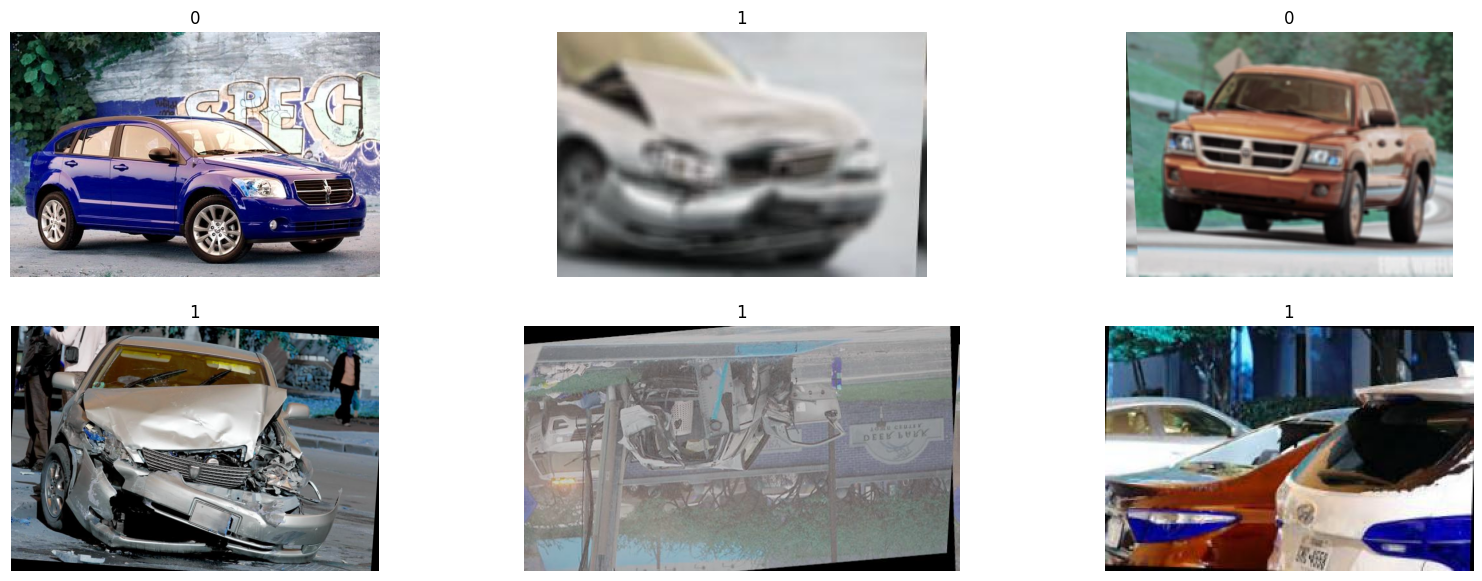

In [12]:
fig = plt.figure(figsize=(20, 7))

rows = 2
columns = 3

Image1 = cv2.imread((img_df['Image_path'][0]))
Image2 = cv2.imread(img_df['Image_path'][1])
Image3 = cv2.imread(img_df['Image_path'][2])
Image4 = cv2.imread(img_df['Image_path'][3])
Image5 = cv2.imread(img_df['Image_path'][4])
Image6 = cv2.imread(img_df['Image_path'][5])

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title(img_df['Condition'][0])
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title(img_df['Condition'][1])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title(img_df['Condition'][2])
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title(img_df['Condition'][3])

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title(img_df['Condition'][4])

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title(img_df['Condition'][5])

### Transform images to vectors and some algorithms to improve them

In [13]:
# Load the VGG16 model pre-trained on ImageNet, without the top layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


In [14]:
def detect_objects(img):
    """Detect objects in the image using OpenCV's pre-trained models."""
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Load a pre-trained model for object detection
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Detect objects in the image
    objects = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return objects

In [15]:

def crop_and_resize(img, bbox, size=(224, 224)):
    """Crop the image to the bounding box and resize it."""
    x, y, w, h = bbox
    cropped_img = img[y:y+h, x:x+w]
    resized_img = cv2.resize(cropped_img, size)
    return resized_img

In [16]:
def calculate_color_histogram(img):
    """Calculate the color histogram of an image."""
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [17]:
def img_to_vector(img_path):
    """Convert an image to a combined feature vector."""
    img = cv2.imread(img_path)
    if img is None:
        return None  # Handle missing images

    # Object detection and cropping
    objects = detect_objects(img)
    if len(objects) > 0:
        img = crop_and_resize(img, objects[0])

    # Resize image for VGG16
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_array = np.expand_dims(img_rgb, axis=0)
    img_array = preprocess_input(img_array)
    
    # Feature extraction with VGG16
    vgg_features = model.predict(img_array).flatten()
    
    # Color histogram
    color_hist = calculate_color_histogram(img_resized)
    
    # Combine features
    combined_features = np.hstack((vgg_features, color_hist))

    return combined_features.flatten()

In [18]:
def add_vectors_to_dataframe(new_img_df, img_column):
    """Add feature vectors to the DataFrame for images in the specified column."""
    feature_vectors = []  # List to store feature vectors
    for img_path in new_img_df[img_column]:
        vector = img_to_vector(img_path)
        feature_vectors.append(vector)
        

    # Convert the list of feature vectors to a DataFrame
    feature_vectors_df = pd.DataFrame(feature_vectors)

    # Rename columns to meaningful names
    num_vgg_features = 4608  # Number of features extracted by VGG16 (depends on the model and layer used)

    feature_columns = [f'{i}' for i in range(num_vgg_features)]
    feature_vectors_df.columns = feature_columns

    # Concatenate the original DataFrame with the feature vectors DataFrame
    new_img_df = pd.concat([new_img_df.reset_index(drop=True), feature_vectors_df.reset_index(drop=True)], axis=1)
    return new_img_df

In [19]:
img_df = add_vectors_to_dataframe(img_df, 'Image_path')

1/1 [==============================] - 1s 501ms/step


In [20]:
img_t_df = add_vectors_to_dataframe(img_t_df, 'Image_path')

1/1 [==============================] - 1s 500ms/step


In [21]:
img_df.head()

,Image_path,Condition,0,1,2,3,4,5,6,7,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,data/Fast_Furious_Insured/trainImages/img_4513...,0,0.0,0.000000,0.0,0.0,26.820709,0.0,0.0,0.000000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.0,0.092600,0.418659
1,data/Fast_Furious_Insured/trainImages/img_7764...,1,0.0,1.115575,0.0,0.0,0.000000,0.0,0.0,2.662647,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.005610,0.031493
2,data/Fast_Furious_Insured/trainImages/img_4513...,0,0.0,2.649820,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071201
3,data/Fast_Furious_Insured/trainImages/img_7768...,1,0.0,0.000000,0.0,0.0,14.300001,0.0,0.0,0.000000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.0,0.001577,0.108803
4,data/Fast_Furious_Insured/trainImages/img_7765...,1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.049940,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [22]:
img_t_df.head()

,Image_path,0,1,2,3,4,5,6,7,8,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,data/Fast_Furious_Insured/testImages/img_45385...,0.000000,0.000000,0.0,8.485637,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083413
1,data/Fast_Furious_Insured/testImages/img_77660...,0.000000,0.000000,0.0,0.000000,8.953945,0.000000,0.000000,0.000000,0.0,...,0.001668,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005624,0.219870
2,data/Fast_Furious_Insured/testImages/img_46373...,2.500708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,data/Fast_Furious_Insured/testImages/img_45161...,0.000000,0.000000,0.0,0.577268,0.000000,0.000000,9.667698,0.000000,0.0,...,0.045947,0.000485,0.0,0.0,0.0,0.0,0.0,0.0,0.043844,0.919806
4,data/Fast_Furious_Insured/testImages/img_45170...,0.000000,0.130305,0.0,1.514182,5.012718,2.093106,0.834200,1.961657,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


### Split the image dataset into two parts


In [23]:
img_train = img_df.drop(columns=["Condition", "Image_path"])
img_y = img_df["Condition"]
img_t_df = img_t_df.drop(columns=["Image_path"])


In [24]:
img_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,0.0,0.000000,0.0,0.0,26.820709,0.0,0.0,0.000000,0.0,0.00000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.0,0.092600,0.418659
1,0.0,1.115575,0.0,0.0,0.000000,0.0,0.0,2.662647,0.0,9.28905,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.005610,0.031493
2,0.0,2.649820,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071201
3,0.0,0.000000,0.0,0.0,14.300001,0.0,0.0,0.000000,0.0,0.00000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.0,0.001577,0.108803
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.049940,0.0,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [25]:
img_y.head()

0    0
1    1
2    0
3    1
4    1
Name: Condition, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(img_train, img_y, test_size = 0.25, random_state = 32)

# train,  validate = train_test_split(img_df, test_size = 0.25, random_state = 32)
print(f"train set shape: {x_train.shape}")
print(f"validation set shape: {x_test.shape}")

train set shape: (1049, 4608)
validation set shape: (350, 4608)


## Model for Classification

In [27]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(x_train)
test_features_scaled = scaler.transform(x_test)
pred_test = scaler.transform(img_t_df)

In [28]:
img_t_df

,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,0.000000,0.000000,0.0,8.485637,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083413
1,0.000000,0.000000,0.0,0.000000,8.953945,0.000000,0.000000,0.000000,0.0,0.000000,...,0.001668,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.005624,0.219870
2,2.500708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.577268,0.000000,0.000000,9.667698,0.000000,0.0,14.485172,...,0.045947,0.000485,0.0,0.0,0.0,0.0,0.0,0.000000,0.043844,0.919806
4,0.000000,0.130305,0.0,1.514182,5.012718,2.093106,0.834200,1.961657,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.136182,0.000264,0.0,0.0,0.0,0.0,0.0,0.000000,0.056199,0.277032
596,0.000000,0.000000,0.0,0.000000,7.262942,0.000000,0.000000,0.000000,0.0,12.824389,...,0.054259,0.001857,0.0,0.0,0.0,0.0,0.0,0.000120,0.041562,0.607804
597,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.155308,0.174380,0.0,0.0,0.0,0.0,0.0,0.004471,0.208507,0.616762
598,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.281318,0.000000,0.0,4.730983,...,0.001358,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.008351,0.007740


Imports for this section:

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


### Using SVM:

In [30]:
# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],  # Only used for 'poly' kernel
    'gamma': ['scale', 'auto']  # Used for 'rbf' and 'poly' kernels
}

# Create the SVC model
svm_classifier = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_features_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Get the best model
best_svc = grid_search.best_estimator_


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters found:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score found:  0.9389838231943495


In [31]:
# Predict on the test set
test_predictions_svm = best_svc.predict(test_features_scaled)

# Evaluate the model
print(classification_report(y_test, test_predictions_svm))
print(confusion_matrix(y_test, test_predictions_svm))
accuracy_score_SVM = accuracy_score(y_test, test_predictions_svm)
print(f'Accuracy: {accuracy_score_SVM}')

              precision    recall  f1-score   support

           0       0.52      0.48      0.50        23
           1       0.96      0.97      0.97       327

    accuracy                           0.94       350
   macro avg       0.74      0.72      0.73       350
weighted avg       0.93      0.94      0.94       350

[[ 11  12]
 [ 10 317]]
Accuracy: 0.9371428571428572


### Using K-nearest neighbors

In [32]:
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the KNN model
knn_classifier = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_features_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best score found:  0.9371018455228981


In [33]:
# Predict on the test set
test_predictions_KNN = best_knn.predict(test_features_scaled)

# Evaluate the model
print(classification_report(y_test, test_predictions_KNN))
print(confusion_matrix(y_test, test_predictions_KNN))
accuracy_score_KNN = accuracy_score(y_test, test_predictions_KNN)
print(f'Accuracy: {accuracy_score_KNN}')

              precision    recall  f1-score   support

           0       0.75      0.13      0.22        23
           1       0.94      1.00      0.97       327

    accuracy                           0.94       350
   macro avg       0.85      0.56      0.60       350
weighted avg       0.93      0.94      0.92       350

[[  3  20]
 [  1 326]]
Accuracy: 0.94


Predict the result of the test table

In [34]:
cond_test = best_knn.predict(pred_test)
cond_test

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1

In [35]:
img_t_df["Condition"] = cond_test
df_t["Condition"] = cond_test

In [36]:
img_t_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,Condition
0,0.000000,0.000000,0.0,8.485637,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083413,1
1,0.000000,0.000000,0.0,0.000000,8.953945,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005624,0.219870,1
2,2.500708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
3,0.000000,0.000000,0.0,0.577268,0.000000,0.000000,9.667698,0.000000,0.0,14.485172,...,0.000485,0.0,0.0,0.0,0.0,0.0,0.0,0.043844,0.919806,1
4,0.000000,0.130305,0.0,1.514182,5.012718,2.093106,0.834200,1.961657,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1


In [37]:
df_t.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0,1
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0,1
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0,1
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0,1
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0,1


## Compare Between the models

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Convert y_test to integers if they are not already
y_test_int = np.array([int(label) for label in y_test])

# For SVM
y_pred_proba_svm = best_svc.decision_function(test_features_scaled)
precision_svm, recall_svm, _ = precision_recall_curve(y_test_int, y_pred_proba_svm)
auc_svm = auc(recall_svm, precision_svm)

# For KNN
y_pred_proba_knn = best_knn.predict_proba(test_features_scaled)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(y_test_int, y_pred_proba_knn)
auc_knn = auc(recall_knn, precision_knn)


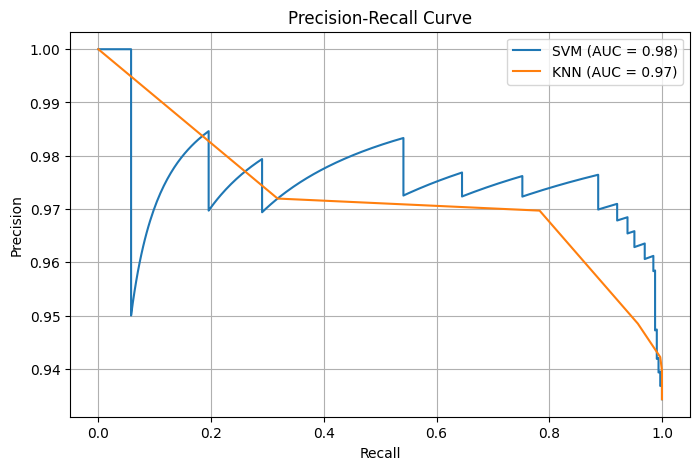

In [39]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall_svm, precision_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Precision-Recall Curve
The Precision-Recall curve is a graphical representation of the trade-off between precision and recall for different threshold settings. The area under the curve (AUC) provides a single metric for comparison:

SVM (AUC = 0.98)

KNN (AUC = 0.97)

Interpretation:

The SVM model has a slightly better precision-recall trade-off compared to the KNN model, as indicated by the higher AUC. This suggests that SVM performs better in distinguishing between the two classes.

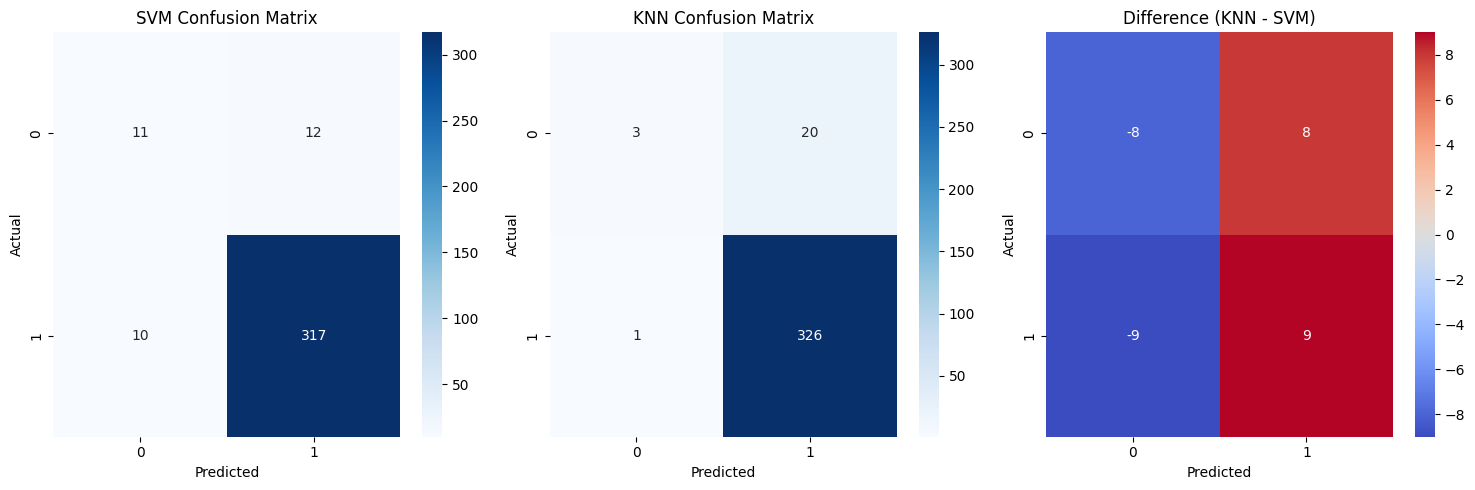

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set for both classifiers
test_predictions_svm = best_svc.predict(test_features_scaled)
test_predictions_knn = best_knn.predict(test_features_scaled)

# Compute confusion matrices
cm_svm = confusion_matrix(y_test, test_predictions_svm)
cm_knn = confusion_matrix(y_test, test_predictions_knn)

# Compute difference matrix (KNN - SVM)
diff_cm = cm_knn - cm_svm

# Plot the confusion matrices side-by-side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('SVM Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('KNN Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(diff_cm, annot=True, fmt='d', cmap='coolwarm', ax=ax[2])
ax[2].set_title('Difference (KNN - SVM)')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### The confusion matrices for SVM and KNN classifiers show the actual versus predicted classifications:


SVM Confusion Matrix:

True Negatives (TN): 10 ,
False Positives (FP): 12 ,
False Negatives (FN): 11 ,
True Positives (TP): 317

KNN Confusion Matrix:

True Negatives (TN): 1 ,
False Positives (FP): 20 ,
False Negatives (FN): 3 ,
True Positives (TP): 326


Difference Matrix (KNN - SVM):

Indicates the difference in predictions between KNN and SVM. A positive value indicates more predictions by KNN, while a negative value indicates fewer predictions.

Interpretation:

SVM shows a better balance between precision and recall with fewer false positives but slightly more false negatives compared to KNN.
KNN has a slightly higher true positive rate but also more false positives.

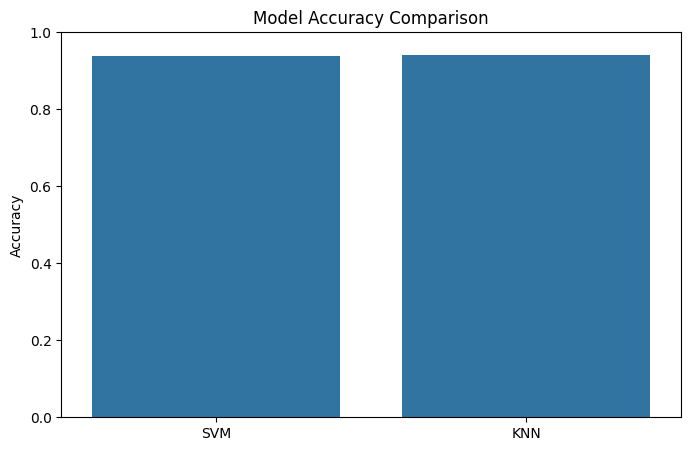

In [41]:
# Compare Accuracy
models = ['SVM', 'KNN']
accuracies = [accuracy_score_SVM, accuracy_score_KNN]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

### Accuracy Comparison
The bar chart compares the overall accuracy of both models:

SVM Accuracy: Higher accuracy compared to KNN in this scenario.

KNN Accuracy: Slightly lower accuracy than SVM.

Interpretation:

Both models have high accuracy, but SVM shows a marginally better performance.

## Conclusion:
Overall Performance: SVM slightly outperforms KNN in terms of precision-recall and accuracy.

Use Case Considerations: If minimizing false positives is crucial (e.g., detecting damaged vehicles where false positives might lead to unnecessary interventions), SVM might be preferred. Conversely, if capturing as many true positives as possible is more critical (e.g., ensuring no damaged vehicle goes undetected), KNN might be more suitable despite the higher false positives.

# Predict the insurance amount of cars (regression)

## Data Visualization

c:\Users\moria\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\moria\AppData\Local\Temp\ipykernel_10724\1745968437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sb.distplot(np.log1p(df['Amount']),color="Purple")


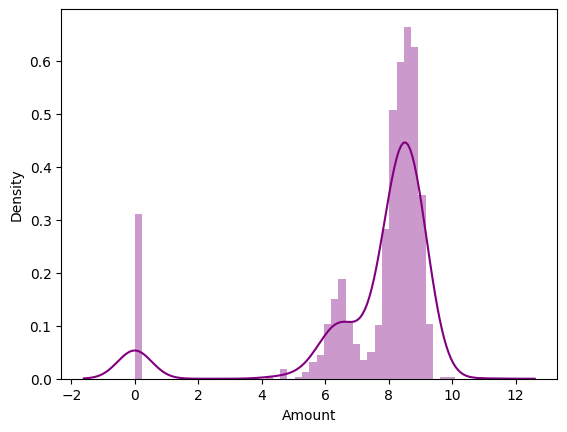

In [42]:
g=sb.distplot(np.log1p(df['Amount']),color="Purple")

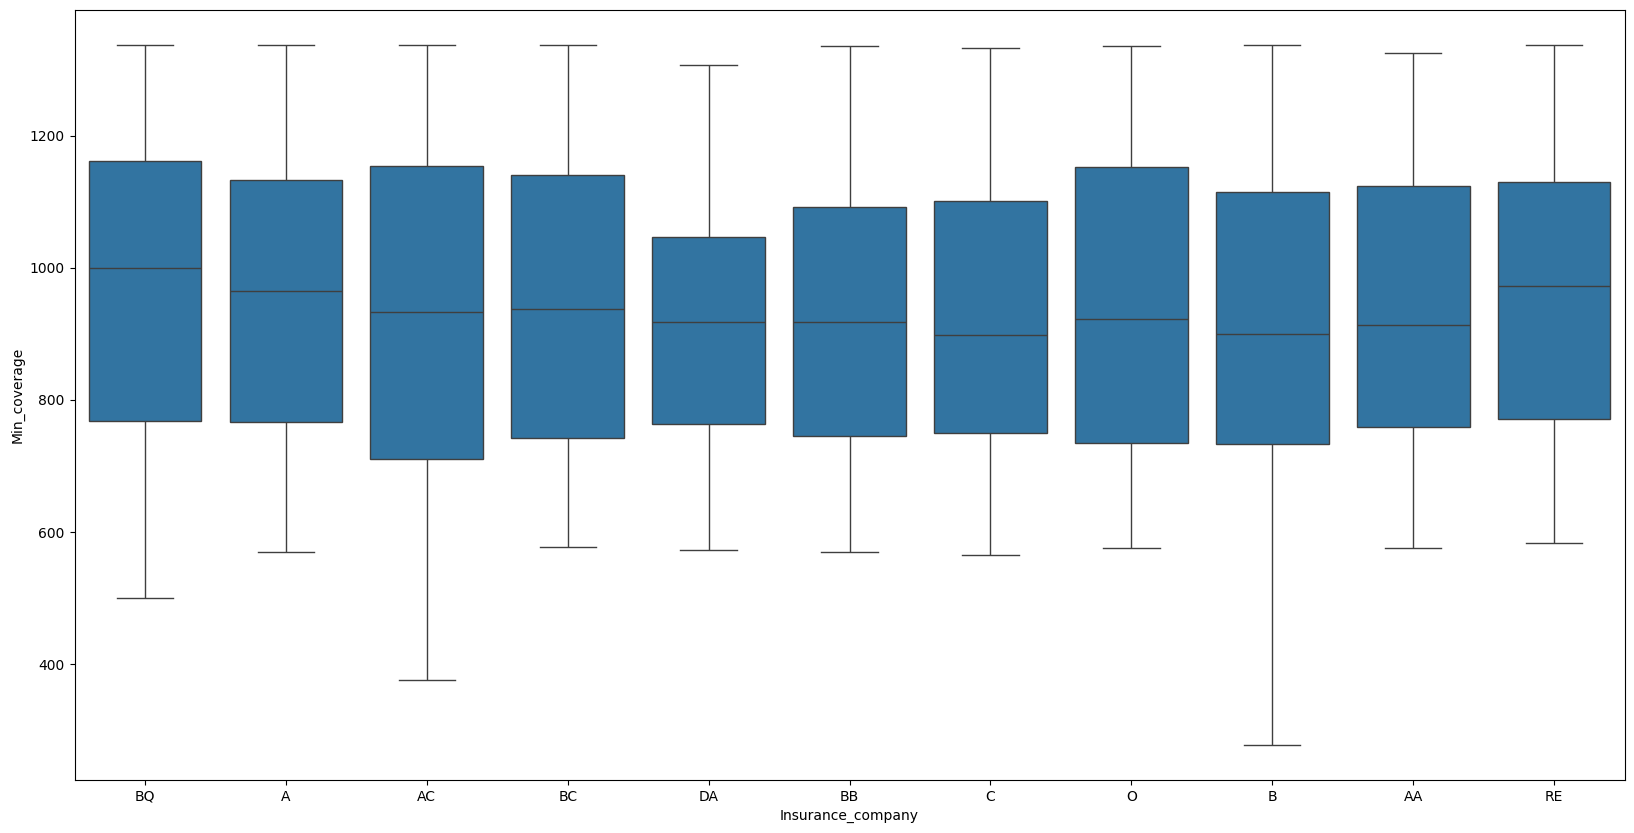

In [43]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Min_coverage", data=df)
plt.show()

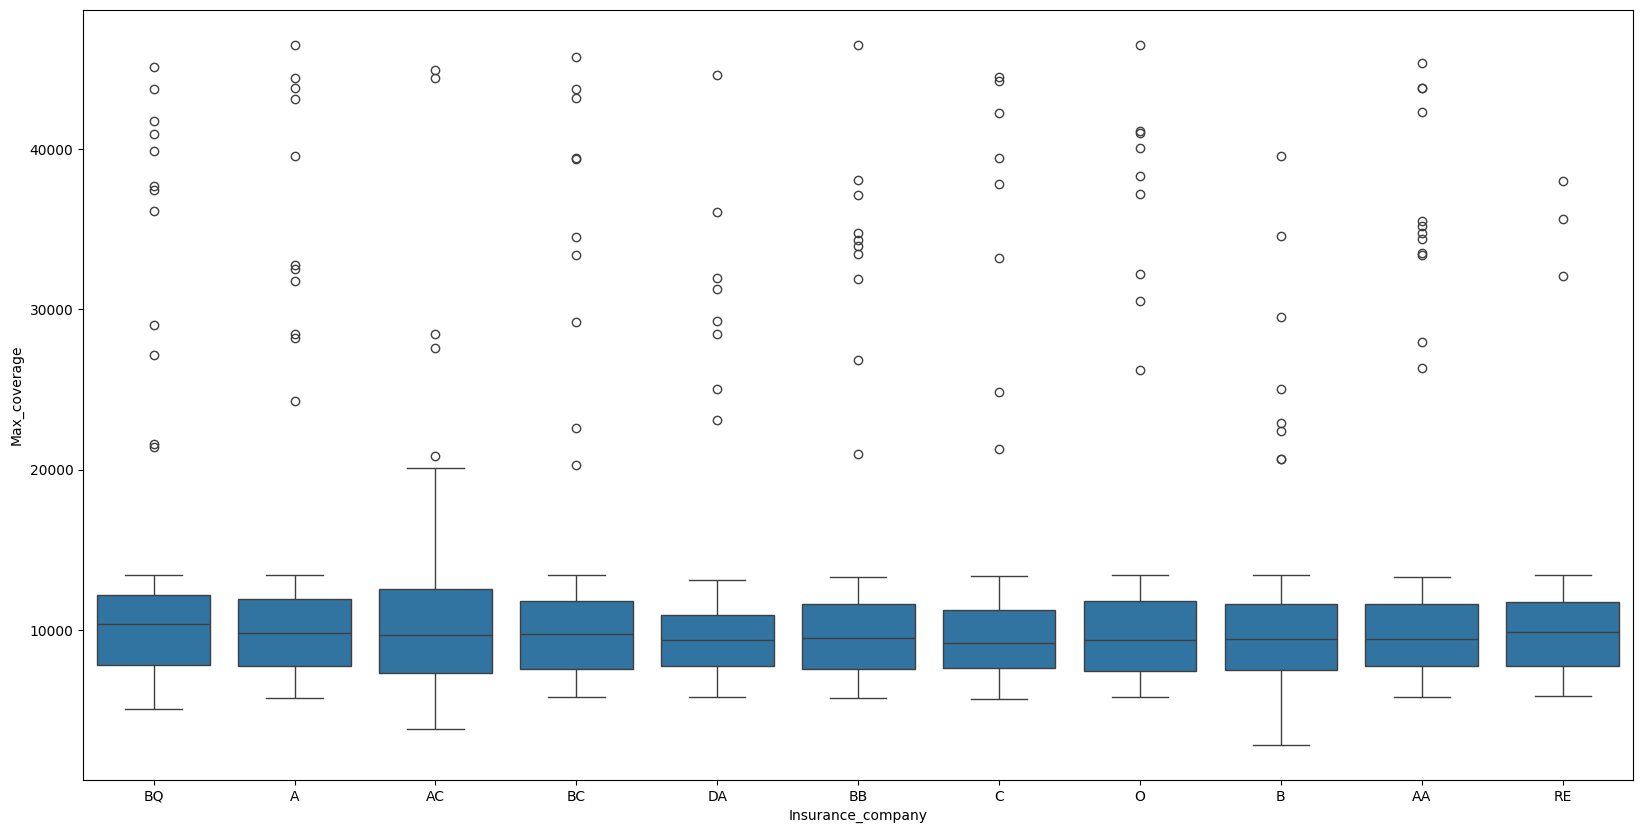

In [44]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Max_coverage", data=df)
plt.show()

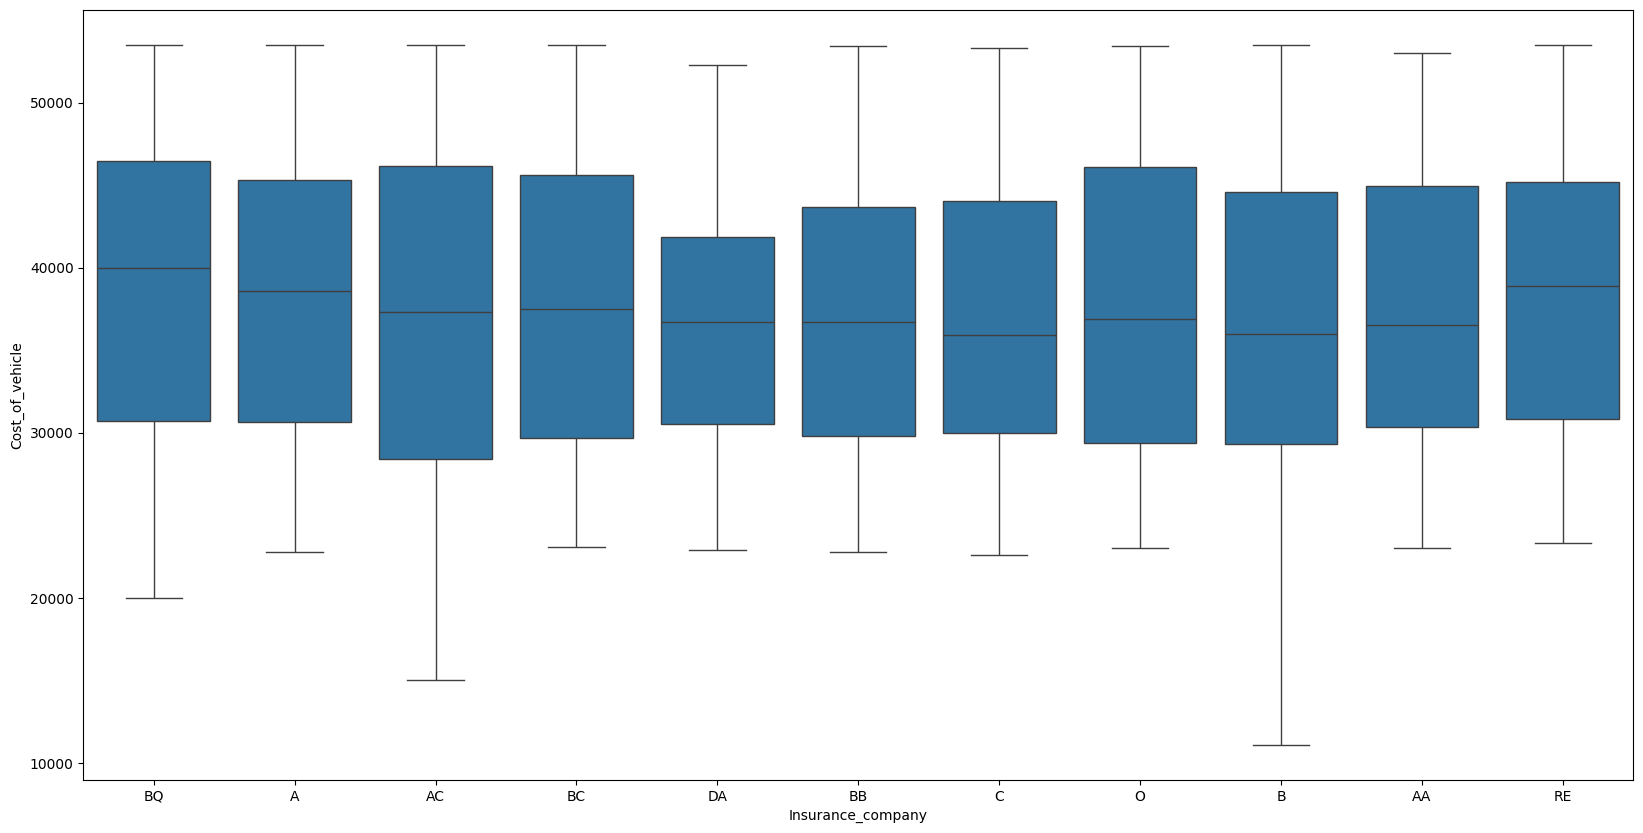

In [45]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Cost_of_vehicle", data=df)
plt.show()

<Figure size 1000x1000 with 0 Axes>

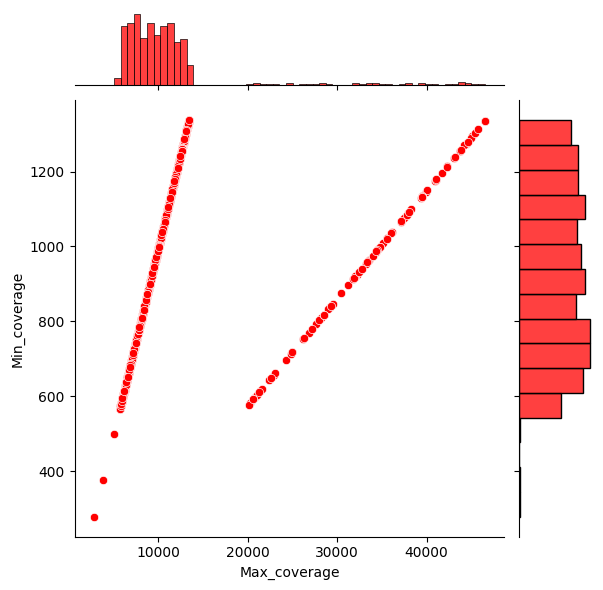

In [46]:
plt.figure(figsize=(10,10 ))
sb.jointplot(x='Max_coverage',y='Min_coverage',data=df,color = 'red')
plt.show()

<Figure size 4000x4000 with 0 Axes>

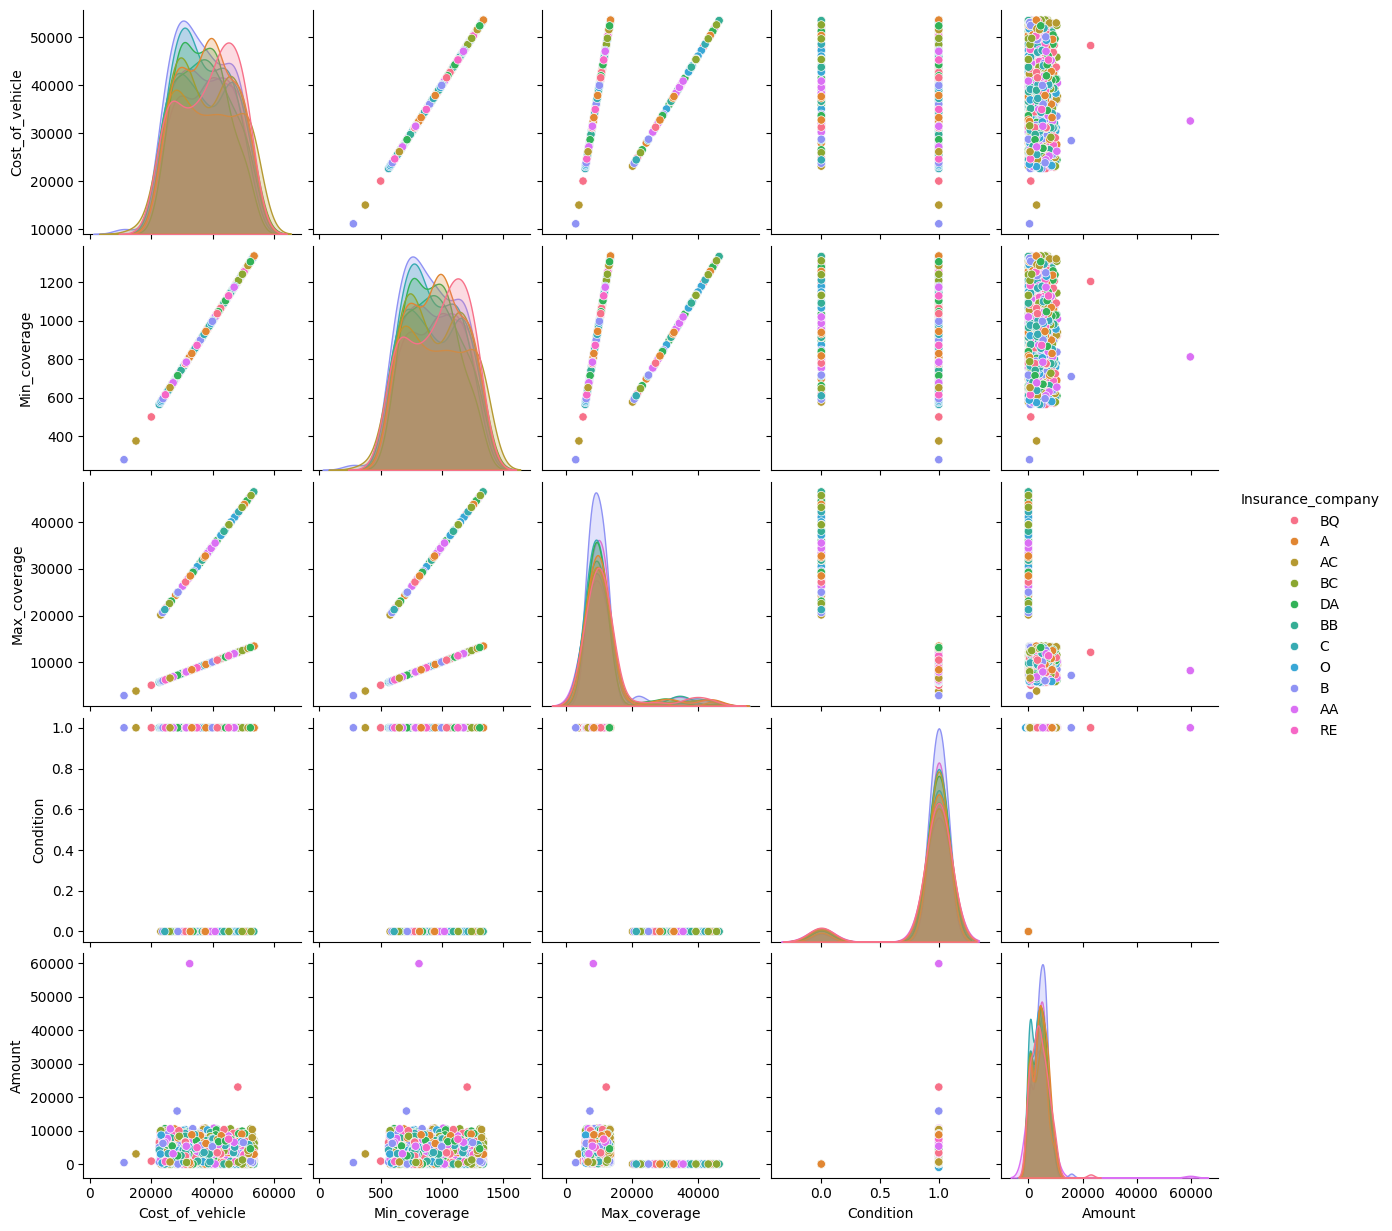

In [47]:
plt.figure(figsize=(40,40 ))
sb.pairplot(df,hue='Insurance_company',diag_kind="kde",kind="scatter",palette="husl")
plt.show()

In [48]:
#Remove outliers
df.loc[df['Max_coverage']>20000,'Max_coverage'] = np.mean(df['Max_coverage'])

## Handle data

### Separating the date into month, year, day

In [49]:
btype = df["Expiry_date"].str.split("-",expand = True)
df["Year"] = btype[0]
df["Month"] = btype[1]
df["Day"] = btype[2]
df=df.drop(columns=['Expiry_date'])
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day
0,data/Fast_Furious_Insured/trainImages/img_4513...,BQ,41500.0,1037.5,11242.92516,0,0.0,2026,12,03
1,data/Fast_Furious_Insured/trainImages/img_7764...,BQ,50700.0,1267.5,12753.00000,1,6194.0,2025,07,10
2,data/Fast_Furious_Insured/trainImages/img_4513...,A,49500.0,1237.5,11242.92516,0,0.0,2022,08,11
3,data/Fast_Furious_Insured/trainImages/img_7768...,A,33500.0,837.5,8453.00000,1,7699.0,2022,08,02
4,data/Fast_Furious_Insured/trainImages/img_7765...,AC,27600.0,690.0,6978.00000,1,8849.0,2026,05,01


### String to float the insuarance company

In [50]:
unique_company_names = df['Insurance_company'].unique()
company_to_number = {company: idx for idx, company in enumerate(unique_company_names)}
df['Insurance_company'] = df['Insurance_company'].map(company_to_number)
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day
0,data/Fast_Furious_Insured/trainImages/img_4513...,0,41500.0,1037.5,11242.92516,0,0.0,2026,12,03
1,data/Fast_Furious_Insured/trainImages/img_7764...,0,50700.0,1267.5,12753.00000,1,6194.0,2025,07,10
2,data/Fast_Furious_Insured/trainImages/img_4513...,1,49500.0,1237.5,11242.92516,0,0.0,2022,08,11
3,data/Fast_Furious_Insured/trainImages/img_7768...,1,33500.0,837.5,8453.00000,1,7699.0,2022,08,02
4,data/Fast_Furious_Insured/trainImages/img_7765...,2,27600.0,690.0,6978.00000,1,8849.0,2026,05,01


### Merge image table with the original data

In [51]:
temp_img_df = img_df.drop(columns="Condition")
outer_merged_df = pd.merge(df, temp_img_df, on='Image_path', how='outer')

dp = df.drop('Image_path', axis=1, inplace=True)
dp = outer_merged_df.drop('Image_path', axis=1, inplace=True)

outer_merged_df.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day,0,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,0,41500.0,1037.5,11242.92516,0,0.0,2026,12,03,0.0,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.0,0.092600,0.418659
1,0,50700.0,1267.5,12753.00000,1,6194.0,2025,07,10,0.0,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.005610,0.031493
2,1,49500.0,1237.5,11242.92516,0,0.0,2022,08,11,0.0,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071201
3,1,33500.0,837.5,8453.00000,1,7699.0,2022,08,02,0.0,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.0,0.001577,0.108803
4,2,27600.0,690.0,6978.00000,1,8849.0,2026,05,01,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


### Drop rows contain NaN 

In [52]:
df = df.dropna()
outer_merged_df = outer_merged_df.dropna()

## Linear Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Splitting the data into training and test sets

In [54]:
LR_data = df.drop(['Amount'], axis=1)
LR_y = df['Amount']
LR_train, LR_test, LR_y_train, LR_y_test = train_test_split(LR_data, LR_y, test_size=0.2, random_state=42)

In [55]:
LR_train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Year,Month,Day
165,1,38600.0,965.0,9728.00000,1,2026,09,14
365,10,43600.0,1090.0,11242.92516,0,2026,05,07
1081,7,27800.0,695.0,7028.00000,1,2026,08,04
883,8,38100.0,952.5,9603.00000,1,2023,01,28
367,10,53500.0,1337.5,13453.00000,1,2026,01,19


In [56]:
LR_data_merge = outer_merged_df.drop(['Amount'], axis=1)
LR_y_merge = outer_merged_df['Amount']
LR_train_merge, LR_test_merge, LR_y_train_merge, LR_y_test_merge = train_test_split(LR_data_merge, LR_y_merge, test_size=0.2, random_state=42)

In [57]:
LR_train_merge.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Year,Month,Day,0,1,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
165,1,38600.0,965.0,9728.00000,1,2026,09,14,0.0,0.000000,...,0.003021,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.004930,0.100180
365,10,43600.0,1090.0,11242.92516,0,2026,05,07,0.0,0.000000,...,0.471308,0.00028,0.0,0.0,0.0,0.0,0.0,0.0,0.549035,0.351965
1081,7,27800.0,695.0,7028.00000,1,2026,08,04,0.0,1.186911,...,0.001923,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.138653,0.206894
883,8,38100.0,952.5,9603.00000,1,2023,01,28,0.0,0.000000,...,0.005579,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.005277,0.118666
367,10,53500.0,1337.5,13453.00000,1,2026,01,19,0.0,1.408053,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


### Standarization of the data

In [58]:
sclr = StandardScaler()
LR_train_scaled = sclr.fit_transform(LR_train)
LR_test_scaled = sclr.transform(LR_test)
LR_train_scaled_merge = sclr.fit_transform(LR_train_merge)
LR_test_scaled_merge = sclr.transform(LR_test_merge)

## Linear Regression Model

In [59]:
linear_regressor = LinearRegression()

In [60]:
#cross_validation
cross_val_scores = cross_val_score(linear_regressor, LR_train_scaled, LR_y_train, cv=5, scoring='r2')
print("Cross-Validation r^2 scores:", cross_val_scores)

#train
linear_regressor.fit(LR_train_scaled, LR_y_train)

#test
test_predictions_LR = linear_regressor.predict(LR_test_scaled)

Cross-Validation r^2 scores: [0.04066204 0.1878938  0.12577804 0.09981892 0.15579006]


In [108]:
#cross_validation
cross_val_scores_m = cross_val_score(linear_regressor, LR_train_scaled_merge, LR_y_train_merge, cv=5, scoring='r2')
print("Cross-Validation r^2 scores:", cross_val_scores_m)

#train
linear_regressor.fit(LR_train_scaled_merge, LR_y_train_merge)

#test
test_predictions_LR_m = linear_regressor.predict(LR_test_scaled_merge)

Cross-Validation r^2 scores: [-4.49635741e+24 -2.90017988e+24 -3.22790050e+23 -6.57499890e+24
 -1.35587498e+21 -1.50373409e+23 -3.40858114e+25 -3.13501653e+25
 -4.63085120e+24]


## Evaluate the model

In [109]:
mae = mean_absolute_error(LR_y_test, test_predictions_LR)
mse = mean_squared_error(LR_y_test, test_predictions_LR)
r2 = r2_score(LR_y_test, test_predictions_LR)

print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 1894.364193375836
MSE: 5873747.341709473
R^2: 0.19496602942713537


In [110]:
mae_m = mean_absolute_error(LR_y_test_merge, test_predictions_LR_m)
mse_m = mean_squared_error(LR_y_test_merge, test_predictions_LR_m)
r2_m = r2_score(LR_y_test_merge, test_predictions_LR_m)

print("MAE:", mae_m)
print("MSE:", mse_m)
print("R^2:", r2_m)

MAE: 3476721643308237.0
MSE: 4.295111498221865e+32
R^2: -5.886720116327635e+25


In [64]:
# sns.histplot(LR_train_scaled)
# plt.title('Distribution of Training Data (Without Images)')
# plt.show()

In [65]:
# sns.histplot(LR_train_scaled_merge)
# plt.title('Distribution of Training Data (With Images)')
# plt.show()

## Random Forest

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Splitting the data into training and test sets

In [67]:
RF_train, RF_test, RF_y_train, RF_y_test = train_test_split(LR_data, LR_y, test_size=0.2, random_state=42)
RF_train_merge, RF_test_merge, RF_y_train_merge, RF_y_test_merge = train_test_split(LR_data_merge, LR_y_merge, test_size=0.2, random_state=42)

## Scaling the features

In [68]:
sclr = StandardScaler()
RF_train_scaled = sclr.fit_transform(RF_train)
RF_test_scaled = sclr.transform(RF_test)
RF_train_scaled_merge = sclr.fit_transform(RF_train_merge)
RF_test_scaled_merge = sclr.transform(RF_test_merge)

In [69]:
# Initializing the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(RF_train_scaled, RF_y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [91]:
# Performing grid search with cross-validation
rf = RandomForestRegressor(max_depth=10, min_samples_leaf= 4, min_samples_split= 10, n_estimators=300)
rf.fit(RF_train_scaled_merge, RF_y_train_merge)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300)

In [71]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Training the model with the best parameters
best_rf_regressor = grid_search.best_estimator_

# Making predictions
test_predictions_RF = best_rf_regressor.predict(RF_test_scaled)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [92]:
# Making predictions
test_predictions_RF_m = rf.predict(RF_test_scaled_merge)

## Evaluating the model

In [103]:
mae_rf = mean_absolute_error(RF_y_test, test_predictions_RF)
mse_rf = mean_squared_error(RF_y_test, test_predictions_RF)
r2_rf = r2_score(RF_y_test, test_predictions_RF)

print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("R^2:", r2_rf)

MAE: 1971.570059630502
MSE: 6401502.732132417
R^2: 0.12263383794411431


In [104]:
mae_m_rf = mean_absolute_error(RF_y_test_merge, test_predictions_RF_m)
mse_m_rf = mean_squared_error(RF_y_test_merge, test_predictions_RF_m)
r2_m_rf = r2_score(RF_y_test_merge, test_predictions_RF_m)

print("MAE:", mae_m_rf)
print("MSE:", mse_m_rf)
print("R^2:", r2_m_rf)

MAE: 1846.9051624502142
MSE: 5499122.295940247
R^2: 0.24631074524936347


### Compare between the modals

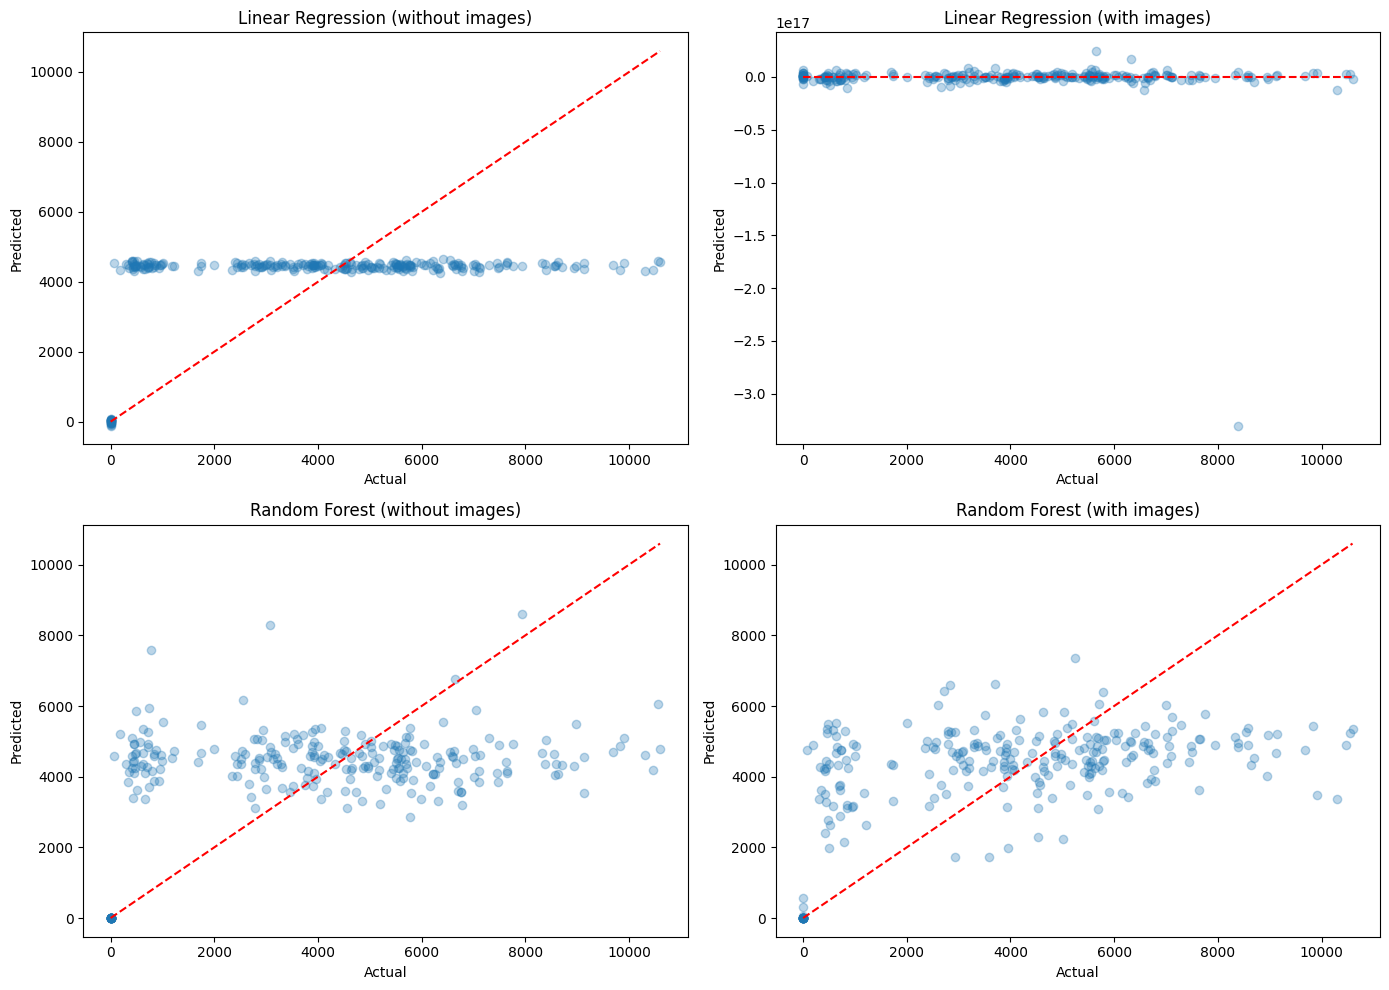

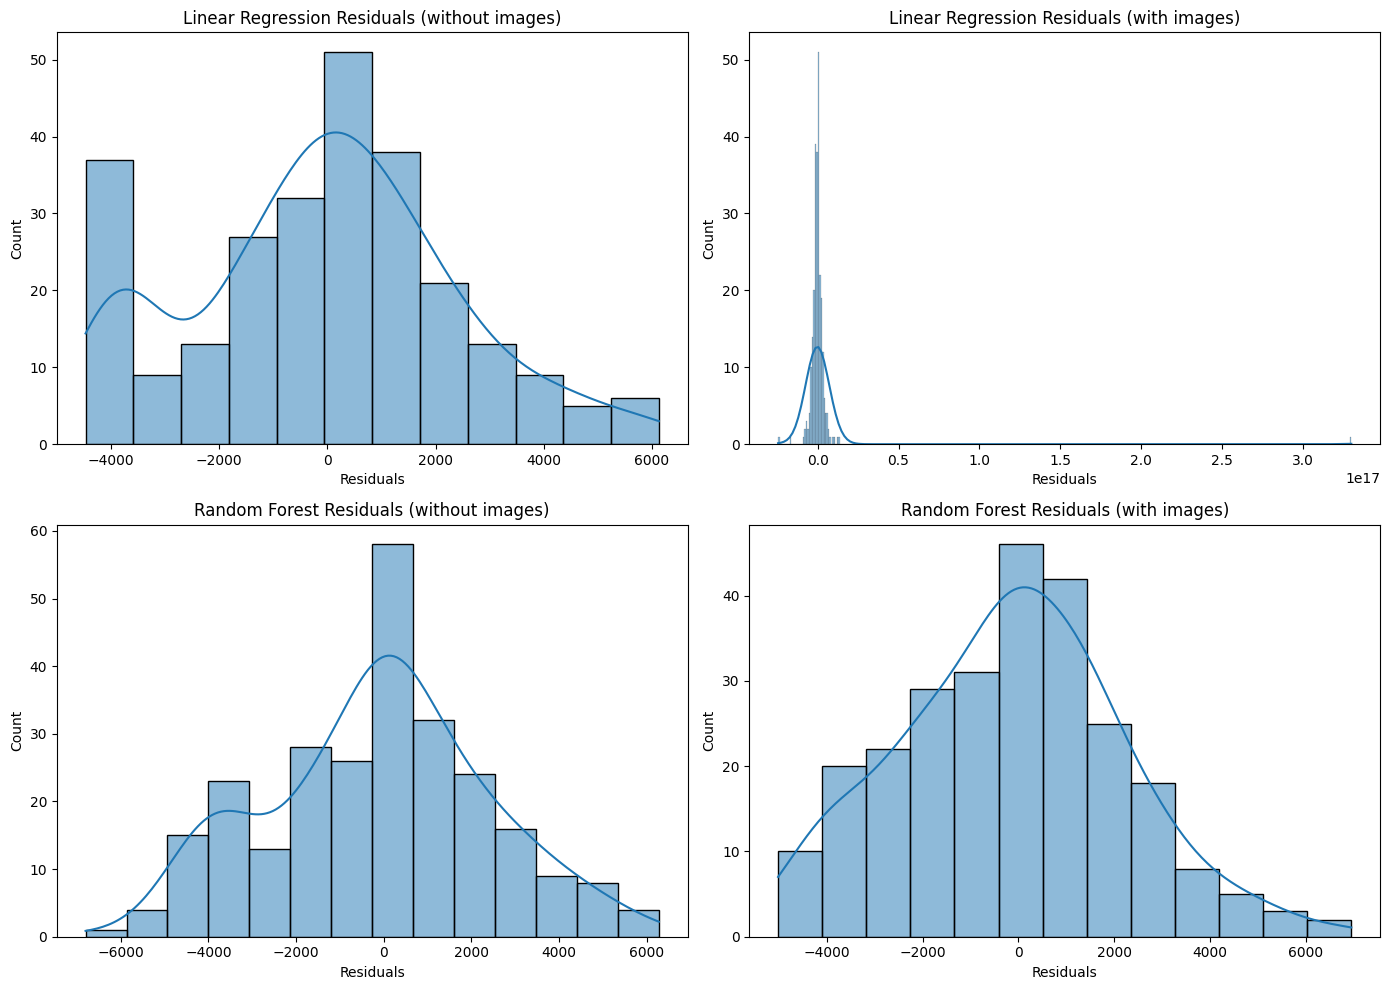

In [98]:
# Actual vs Predicted plots
plt.figure(figsize=(14, 10))

# Linear Regression without images
plt.subplot(2, 2, 1)
plt.scatter(LR_y_test, test_predictions_LR, alpha=0.3)
plt.plot([LR_y_test.min(), LR_y_test.max()], [LR_y_test.min(), LR_y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression (without images)')

# Linear Regression with images
plt.subplot(2, 2, 2)
plt.scatter(LR_y_test_merge, test_predictions_LR_m, alpha=0.3)
plt.plot([LR_y_test_merge.min(), LR_y_test_merge.max()], [LR_y_test_merge.min(), LR_y_test_merge.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression (with images)')

# Random Forest without images
plt.subplot(2, 2, 3)
plt.scatter(RF_y_test, test_predictions_RF, alpha=0.3)
plt.plot([RF_y_test.min(), RF_y_test.max()], [RF_y_test.min(), RF_y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest (without images)')

# Random Forest with images
plt.subplot(2, 2, 4)
plt.scatter(RF_y_test_merge, test_predictions_RF_m, alpha=0.3)
plt.plot([RF_y_test_merge.min(), RF_y_test_merge.max()], [RF_y_test_merge.min(), RF_y_test_merge.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest (with images)')

plt.tight_layout()
plt.show()

# Residual plots
plt.figure(figsize=(14, 10))

# Linear Regression without images
plt.subplot(2, 2, 1)
sns.histplot(LR_y_test - test_predictions_LR, kde=True)
plt.xlabel('Residuals')
plt.title('Linear Regression Residuals (without images)')

# Linear Regression with images
plt.subplot(2, 2, 2)
sns.histplot(LR_y_test_merge - test_predictions_LR_m, kde=True)
plt.xlabel('Residuals')
plt.title('Linear Regression Residuals (with images)')

# Random Forest without images
plt.subplot(2, 2, 3)
sns.histplot(RF_y_test - test_predictions_RF, kde=True)
plt.xlabel('Residuals')
plt.title('Random Forest Residuals (without images)')

# Random Forest with images
plt.subplot(2, 2, 4)
sns.histplot(RF_y_test_merge - test_predictions_RF_m, kde=True)
plt.xlabel('Residuals')
plt.title('Random Forest Residuals (with images)')

plt.tight_layout()
plt.show()

### Explanation about comparison: 

<ins>Linear Regression without images:</ins> Poor performance, predictions do not align well with actual values.<br />

<ins>Linear Regression with images:</ins> Extremely poor performance, likely due to data scaling or input issues.<br />

<ins>Random Forest without images:</ins> Better than linear regression without images, but still with significant prediction errors.<br />

<ins>Random Forest with images:</ins> Best performance among the four models, indicating that image data helps improve prediction accuracy.

In [105]:
comparison_stats = {
    'Model': ['Linear Regression (without images)', 'Linear Regression (with images)', 
              'Random Forest (without images)', 'Random Forest (with images)'],
    'MAE': [mae, mae_m, mae_rf, mae_m_rf],
    'MSE': [mse, mse_m, mse_rf, mse_m_rf],
    'R^2': [r2, r2_m, r2_rf, r2_m_rf]
}

comparison_df = pd.DataFrame(comparison_stats)
print(comparison_df)


                                Model           MAE           MSE   
0  Linear Regression (without images)  1.971570e+03  6.401503e+06  \
1     Linear Regression (with images)  3.476722e+15  4.295111e+32   
2      Random Forest (without images)  1.971570e+03  6.401503e+06   
3         Random Forest (with images)  1.846905e+03  5.499122e+06   

            R^2  
0  1.226338e-01  
1 -5.886720e+25  
2  1.226338e-01  
3  2.463107e-01  


## Adding Model adaboost with estimator of decisionTree

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [76]:
# Define the AdaBoost model with a DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=10)
ada_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=500, learning_rate=0.01, loss= 'linear')
# Fit the GridSearchCV object to the training data
ada_regressor.fit(RF_train_scaled_merge, RF_y_train_merge)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=500)

In [77]:
test_predictions = ada_regressor.predict(RF_test_scaled_merge)

In [82]:
mae_m = mean_absolute_error(RF_y_test_merge, test_predictions)
mse_m = mean_squared_error(RF_y_test_merge, test_predictions)
r2_m = r2_score(RF_y_test_merge, test_predictions)

print("MAE:", mae_m)
print("MSE:", mse_m)
print("R^2:", r2_m)

MAE: 1835.7612248463595
MSE: 5475479.1625063205
R^2: 0.24955118520665298


In [88]:
# Define the AdaBoost model with a DecisionTreeClassifier as the base estimator
base_estimator_ = DecisionTreeRegressor(max_depth=5)
# ada_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=500, learning_rate=0.01, loss= 'linear')
ada_regressor_ = AdaBoostRegressor(estimator=base_estimator_, n_estimators=100, learning_rate=0.01, loss= 'linear')
# Fit the GridSearchCV object to the training data
ada_regressor_.fit(RF_train_scaled, RF_y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.01, n_estimators=100)

In [89]:
test_predictions_ = ada_regressor_.predict(RF_test_scaled)

In [90]:
mae = mean_absolute_error(RF_y_test, test_predictions_)
mse = mean_squared_error(RF_y_test, test_predictions_)
r2 = r2_score(RF_y_test, test_predictions_)

print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 1895.151887381133
MSE: 5872759.042859434
R^2: 0.1951014819927761


As we can see, accept for the linear regression modal, the best results is the data with the images scalar.

### Why it is happening

As we can see these regression models are having negative or low R2 score, so here is, why it is happening:



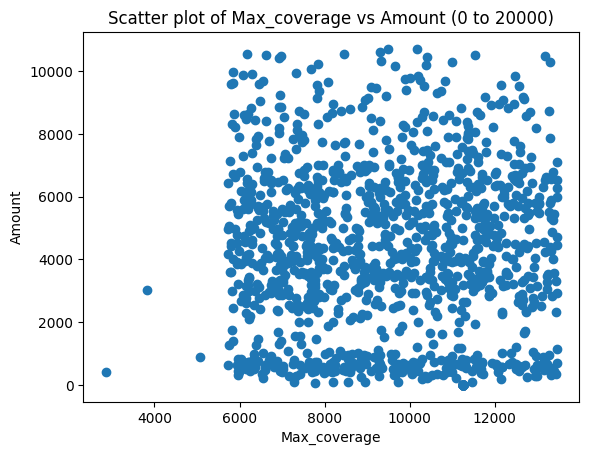

In [87]:
filtered_df = LR_data[LR_y <= 14000]
LR_data_filter = LR_y[LR_y <= 14000]
# Plot the filtered data
plt.scatter(filtered_df['Max_coverage'], LR_data_filter)
plt.xlabel('Max_coverage')
plt.ylabel('Amount')
plt.title('Scatter plot of Max_coverage vs Amount (0 to 20000)')
plt.show()


we think that the negative value or low value of R2 score is justified and we guess no machine learning model can fit over this noised data, and similary for other features as well, feature Amount is not showing any kind of correlation. 

We think that maybe using deep learning here will help and give as more accurate results.